In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  


In [49]:
# Load the datasets
Dtrain = pd.read_csv(r"C:\Users\Sarthak Vyas\Desktop\GST\Dataset\X_Train_Data_Input-1.csv")
Dtest = pd.read_csv(r"C:\Users\Sarthak Vyas\Desktop\GST\Dataset\X_Test_Data_Input-1.csv")
Ytrain = pd.read_csv(r"C:\Users\Sarthak Vyas\Desktop\GST\Dataset\Y_Train_Data_Target-1.csv")
Ytest = pd.read_csv(r"C:\Users\Sarthak Vyas\Desktop\GST\Dataset\Y_Test_Data_Target-1.csv")


In [51]:
# Check the data types of the columns
print(Dtrain.dtypes)

# Identify non-numeric columns
non_numeric_cols = Dtrain.select_dtypes(exclude='number').columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


ID           object
Column0     float64
Column1       int64
Column2     float64
Column3     float64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10      int64
Column11      int64
Column12      int64
Column13      int64
Column14    float64
Column15    float64
Column16    float64
Column17      int64
Column18    float64
Column19      int64
Column20      int64
Column21      int64
dtype: object
Non-numeric columns: ['ID']


In [52]:
for column in Dtrain.select_dtypes(include=[np.number]).columns:
    Dtrain[column].fillna(Dtrain[column].mean(), inplace=True)


C:\Users\Sarthak Vyas\AppData\Local\Temp\ipykernel_13880\3534436546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dtrain[column].fillna(Dtrain[column].mean(), inplace=True)


In [53]:
for column in Dtrain.select_dtypes(include=[np.number]).columns:
    Dtrain[column].fillna(Dtrain[column].median(), inplace=True)


C:\Users\Sarthak Vyas\AppData\Local\Temp\ipykernel_13880\945373275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dtrain[column].fillna(Dtrain[column].median(), inplace=True)
C:\Users\Sarthak Vyas\AppData\Local\Temp\ipykernel_13880\945373275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [54]:
Dtrain_sample = Dtrain.sample(frac=0.1, random_state=42)  # Use 10% of the data for testing


In [56]:
print(Dtrain.dtypes)


ID           object
Column0     float64
Column1       int64
Column2     float64
Column3     float64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10      int64
Column11      int64
Column12      int64
Column13      int64
Column14    float64
Column15    float64
Column16    float64
Column17      int64
Column18    float64
Column19      int64
Column20      int64
Column21      int64
dtype: object


In [58]:
# Identify non-numeric columns
non_numeric_cols = Dtrain.select_dtypes(exclude='number').columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['ID']


In [59]:
for col in non_numeric_cols:
    Dtrain[col] = pd.to_numeric(Dtrain[col], errors='coerce')  # Converts non-convertible values to NaN


In [60]:
Dtrain.drop(columns=non_numeric_cols, inplace=True)


In [61]:
Dtrain.fillna(Dtrain.mean(numeric_only=True), inplace=True)


In [62]:
print(Dtrain.isnull().sum())  # Check for any remaining missing values


Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


In [63]:
%timeit Dtrain.fillna(Dtrain.mean(numeric_only=True), inplace=True)


4.14 ms ± 353 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
# Print the column names of Dtrain
print(Dtrain.columns.tolist())


['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']


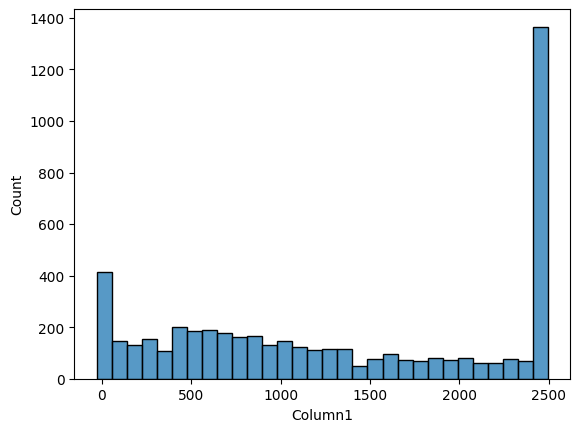

In [66]:
# Use the correct column name found in Step 2
sns.histplot(Dtrain['Column1'], bins=30)
plt.show()


In [67]:
print(Dtrain.isnull().sum())  # Check for any missing values in the DataFrame


Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


In [69]:
print(Dtrain.describe())


           Column0      Column1       Column2      Column3      Column4  \
count  5000.000000  5000.000000   5000.000000  5000.000000  5000.000000   
mean      0.433600  1337.639200   2971.379200     0.016930     0.016217   
std       1.134305   912.426813   2169.581414     0.903901     0.898622   
min       0.000000   -27.000000      3.000000    -2.028572    -1.855728   
25%       0.000000   523.000000   1110.500000     0.001462    -0.150974   
50%       0.000000  1198.500000   2763.500000     0.452580     0.488309   
75%       0.000000  2449.250000   4478.000000     0.678139     0.701403   
max      15.000000  2495.000000  10290.000000     0.678139     0.701403   

           Column5      Column6      Column7      Column8      Column9  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean     -0.006839     0.002044    -0.005607    -0.009697    -0.030458  ...   
std       0.024351     0.999078     0.644833     0.796053     0.086071  ...   
min     

In [71]:
# Print the column names of Dtrain
print(Dtrain.columns.tolist())


['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']


In [72]:
Dtrain['new_feature'] = Dtrain['Column1'] * Dtrain['Column2']


In [73]:
if 'Column1' in Dtrain.columns and 'Column2' in Dtrain.columns:
    Dtrain['new_feature'] = Dtrain['Column1'] * Dtrain['Column2']
else:
    print("One or both columns do not exist.")


In [74]:
Dtrain = pd.get_dummies(Dtrain, drop_first=True)


In [76]:
# Print the column names of Dtrain
print(Dtrain.columns.tolist())


['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21', 'new_feature']


In [79]:
X = Dtrain.drop(columns=['Column1'])  # Replace with the actual target column name
y = Dtrain['Column2']  # Again, use the correct name


In [80]:
# Display the first few rows of Dtrain
print(Dtrain.head())


   Column0  Column1  Column2   Column3   Column4   Column5   Column6  \
0      2.0     2495   3726.0  0.678139  0.701403 -0.007468  0.434190   
1      0.0     2495   3454.0  0.452580  0.701403 -0.007468  1.554998   
2      2.0     2495   4543.0 -1.577453 -1.429540 -0.007469 -0.407939   
3      0.0      211     59.0  0.016930  0.016217 -0.006839 -0.407939   
4      0.0      718    950.0 -2.028572 -1.855728 -0.006839 -0.407939   

    Column7   Column8   Column9  ...  Column13  Column14  Column15  Column16  \
0 -0.015603  0.606265 -0.030458  ...         0  0.001351   0.00339       0.0   
1 -0.015574  0.329946 -0.030458  ...         0  0.001351   0.00339       0.0   
2 -0.015607 -0.774979 -0.030458  ...         1  0.001351   0.00339       0.0   
3 -0.015607 -0.774979 -0.030458  ...         0  0.001327   0.00339       0.0   
4 -0.015607 -0.774979 -0.030458  ...         0  0.001327   0.00339       0.0   

   Column17  Column18  Column19  Column20  Column21  new_feature  
0         0       0

In [82]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4997, 22)
y_train shape: (2,)


In [84]:
print(y_train[:5])  # Print the first 5 elements


[0 1]


In [85]:
print(len(y_train))  # Print the length of the array


2


In [86]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4997, 22)
y_train shape: (2,)


In [87]:
# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Inspect y_train
print("First 5 elements of y_train:", y_train[:5])
print("Length of y_train:", len(y_train))


X_train shape: (4997, 22)
y_train shape: (2,)
First 5 elements of y_train: [0 1]
Length of y_train: 2


In [89]:
print(Dtrain.columns.tolist())


['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21', 'new_feature']


In [92]:
target_column_name = 'Column0'  # Replace this with the actual column name
X = Dtrain.drop(columns=[target_column_name])
y = Dtrain[target_column_name]


In [95]:
# Check the columns in Dtrain
print("Columns in Dtrain:", Dtrain.columns.tolist())

# Specify the correct target column name
target_column_name = 'Column0'  # Update this

# Prepare the features and target
X = Dtrain.drop(columns=[target_column_name])
y = Dtrain[target_column_name]

# Perform the train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Columns in Dtrain: ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21', 'new_feature']
X_train shape: (4000, 22)
y_train shape: (4000,)


In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # Ensure you fit the model with training data


LinearRegression()

In [98]:
predictions = model.predict(X_val)  # This should work after fitting the model


In [100]:
print(Dtrain.columns)


Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'new_feature'],
      dtype='object')


In [104]:
# Print the columns to find the correct target column name
print(Dtrain.columns)

# Once you have the correct column name, update the line below
target_column_name = 'Column1'  # Replace with the actual name you found

# Drop the target column to create feature set X and define target variable y
X = Dtrain.drop(columns=[target_column_name])
y = Dtrain[target_column_name]

# Proceed with splitting and training the model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_val)

# Optionally, print predictions to see the output
print(predictions)


Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'new_feature'],
      dtype='object')
[ 1.38216593e+03  2.35737933e+03  1.79674149e+03  1.47110968e+03
  9.08243993e+02 -1.02429383e+03  1.99269783e+03  1.97581434e+03
  1.39452402e+03  1.47632674e+03  2.66416879e+03  1.45168972e+03
  1.97180767e+03  3.53259780e+02  1.55868532e+03  1.40704483e+03
  1.34181287e+03  9.04330284e+01  2.42568853e+03  8.65103830e+02
  1.46035542e+03  2.86154119e+03  1.11175670e+03  2.77876655e+03
  9.73228241e+02  4.77234937e+02  1.89102484e+03  1.29363413e+03
  9.36209409e+02  1.78917282e+03  9.13908160e+02  3.03915578e+03
  2.37623203e+03  2.62821856e+03  3.66673352e+02  1.22403281e+03
  5.89418895e+02  1.12623557e+03  7.81290961e+02  1.86847864e+03
  1.26013405e+02  2.27511145e+

In [106]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 216786.9632837624


In [108]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4000, 22)
y_train shape: (4000,)


In [109]:
print(X_train.dtypes)
print(y_train.dtype)


Column0        float64
Column2        float64
Column3        float64
Column4        float64
Column5        float64
Column6        float64
Column7        float64
Column8        float64
Column9        float64
Column10         int64
Column11         int64
Column12         int64
Column13         int64
Column14       float64
Column15       float64
Column16       float64
Column17         int64
Column18       float64
Column19         int64
Column20         int64
Column21         int64
new_feature    float64
dtype: object
int64


In [110]:
# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Optionally fill missing values
X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)


Column0        0
Column2        0
Column3        0
Column4        0
Column5        0
Column6        0
Column7        0
Column8        0
Column9        0
Column10       0
Column11       0
Column12       0
Column13       0
Column14       0
Column15       0
Column16       0
Column17       0
Column18       0
Column19       0
Column20       0
Column21       0
new_feature    0
dtype: int64
0


In [111]:
# Use a simple linear regression without hyperparameter tuning as a baseline
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Define the parameter grid (without 'normalize')
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'fit_intercept': True}


In [114]:
import sklearn
print(sklearn.__version__)


1.5.2


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and model fitting
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', LinearRegression())
])

# Define the parameter grid for the model in the pipeline
param_grid = {
    'model__fit_intercept': [True, False]
}

# Fit the pipeline with GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'model__fit_intercept': True}


In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge

# Load or define your data here
# Example data
X_train = np.random.rand(5000, 5)  # 5000 samples, 5 features
Ytrain = pd.DataFrame(np.random.rand(5000, 1))  # 5000 samples, 1 target

# Flatten y_train
y_train = Ytrain.values.flatten()

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Set up the model and parameters for tuning
model = Ridge()

param_dist = {
    'alpha': np.logspace(-3, 3, 7),  # Range of alpha values for Ridge
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')


X_train shape: (5000, 5)
y_train shape: (5000,)
Best parameters: {'fit_intercept': True, 'copy_X': False, 'alpha': 100.0}


In [122]:
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [123]:
def predict(input_data):
    model = joblib.load('linear_regression_model.pkl')
    return model.predict(input_data)
